# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Dependencies and Setup

In [202]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import api_keys
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [129]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

612

In [130]:
#pass list to dataframe and preview
cities_df = pd.DataFrame.from_records([cities])
cities_df = cities_df.transpose()
cities_df = cities_df.rename(columns={0:"City"})
cities_df.head()

,City
0,arraial do cabo
1,albany
2,rikitea
3,georgetown
4,airai


### Perform API Calls


In [136]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).
cities_weather=cities_df
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Work on Requests")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("Request not found, skipping...")

    else:
        cities_weather.set_value(index, "City", city_data["name"])
        cities_weather.set_value(index, "Country", city_data["sys"]["country"])
        cities_weather.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        cities_weather.set_value(index, "Latitude", city_data["coord"]["lat"])
        cities_weather.set_value(index, "Longitude", city_data["coord"]["lon"])
        cities_weather.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        cities_weather.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        cities_weather.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: Request # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Work on Requests
------------------------
Proceesing: Request #  1  |  Arraial do Cabo BR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=arraial+do+cabo
------------------------
Proceesing: Request #  2  |  Albany US
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=albany
------------------------
Proceesing: Request #  3  |  Rikitea PF
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=rikitea
------------------------
Proceesing: Request #  4  |  Georgetown GY
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=georgetown
------------------------
Proceesing: Request #  5  |  Airai TL
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=airai
------------------------
Proceesing: Request #  6  |  Busselton AU
http://api

------------------------
Proceesing: Request #  47  |  Port Alfred ZA
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=port+alfred
------------------------
Proceesing: Request #  48  |  Husavik CA
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=husavik
------------------------
Proceesing: Request #  49  |  New Norfolk AU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=new+norfolk
Request not found, skipping...
Request not found, skipping...
------------------------
Proceesing: Request #  50  |  Komsomolskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=komsomolskiy
------------------------
Proceesing: Request #  51  |  Duluth US
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=duluth
------------------------
Proc

------------------------
Proceesing: Request #  91  |  San Patricio PY
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=san+patricio
------------------------
Proceesing: Request #  92  |  Svetlaya RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=svetlaya
Request not found, skipping...
------------------------
Proceesing: Request #  93  |  Bend US
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=bend
------------------------
Proceesing: Request #  94  |  Tete MZ
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=tete
------------------------
Proceesing: Request #  95  |  Vestmannaeyjar IS
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=vestmannaeyjar
------------------------
Proceesing: Request #  96  |  Hobyo SO
http:/

------------------------
Proceesing: Request #  138  |  Eureka US
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=eureka
------------------------
Proceesing: Request #  139  |  Acapulco MX
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=acapulco
------------------------
Proceesing: Request #  140  |  Urengoy RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=urengoy
------------------------
Proceesing: Request #  141  |  Tourlaville FR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=tourlaville
------------------------
Proceesing: Request #  142  |  Forestville CA
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=forestville
------------------------
Proceesing: Request #  143  |  Worland US
http://api.openweathermap.o

------------------------
Proceesing: Request #  183  |  Islahiye TR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=islahiye
------------------------
Proceesing: Request #  184  |  Dukat RS
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=dukat
------------------------
Proceesing: Request #  185  |  Marsa Matruh EG
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=marsa+matruh
------------------------
Proceesing: Request #  186  |  Tazovskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=tazovskiy
------------------------
Proceesing: Request #  187  |  Usogorsk RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=usogorsk
------------------------
Proceesing: Request #  188  |  Vondrozo MG
http://api.openweathermap.or

------------------------
Proceesing: Request #  229  |  Boguchany RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=boguchany
------------------------
Proceesing: Request #  230  |  Predivinsk RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=predivinsk
------------------------
Proceesing: Request #  231  |  Vardo US
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=vardo
------------------------
Proceesing: Request #  232  |  Anito PH
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=anito
------------------------
Proceesing: Request #  233  |  Vila Franca do Campo PT
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=vila+franca+do+campo
------------------------
Proceesing: Request #  234  |  Port Hedland AU
http://api

------------------------
Proceesing: Request #  274  |  Acari BR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=acari
------------------------
Proceesing: Request #  275  |  Altus US
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=altus
------------------------
Proceesing: Request #  276  |  Kharp RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=kharp
------------------------
Proceesing: Request #  277  |  Clyde River CA
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=clyde+river
------------------------
Proceesing: Request #  278  |  Bereda ES
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=bereda
------------------------
Proceesing: Request #  279  |  Tukums LV
http://api.openweathermap.org/data/2.5/weather?app

------------------------
Proceesing: Request #  320  |  Nelson Bay AU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=nelson+bay
------------------------
Proceesing: Request #  321  |  Nanakuli US
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=nanakuli
------------------------
Proceesing: Request #  322  |  Prince Rupert CA
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=prince+rupert
------------------------
Proceesing: Request #  323  |  Muzaffarpur IN
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=muzaffarpur
------------------------
Proceesing: Request #  324  |  Upata VE
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=upata
------------------------
Proceesing: Request #  325  |  Ranong TH
http://api.openweath

------------------------
Proceesing: Request #  364  |  Pankrushikha RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=pankrushikha
------------------------
Proceesing: Request #  365  |  Cayenne GF
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=cayenne
Request not found, skipping...
------------------------
Proceesing: Request #  366  |  Mabaruma GY
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=mabaruma
------------------------
Proceesing: Request #  367  |  Pozo Colorado PY
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=pozo+colorado
------------------------
Proceesing: Request #  368  |  Perevolotskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=perevolotskiy
------------------------
Proceesing: Reques

------------------------
Proceesing: Request #  410  |  Pochutla MX
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=pochutla
------------------------
Proceesing: Request #  411  |  Sananduva BR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=sananduva
------------------------
Proceesing: Request #  412  |  San Luis AR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=san+luis
------------------------
Proceesing: Request #  413  |  Te Anau NZ
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=te+anau
------------------------
Proceesing: Request #  414  |  Beloha MG
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=beloha
Request not found, skipping...
------------------------
Proceesing: Request #  415  |  Beringovskiy RU
h

------------------------
Proceesing: Request #  455  |  Basco US
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=basco
------------------------
Proceesing: Request #  456  |  Kieta PG
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=kieta
------------------------
Proceesing: Request #  457  |  Saldanha PT
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=saldanha
Request not found, skipping...
------------------------
Proceesing: Request #  458  |  Gorontalo ID
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=gorontalo
------------------------
Proceesing: Request #  459  |  Niceville US
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=niceville
------------------------
Proceesing: Request #  460  |  Trinidad UY
http://ap

------------------------
Proceesing: Request #  500  |  Portland US
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=portland
------------------------
Proceesing: Request #  501  |  Praia da Vitoria PT
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=praia+da+vitoria
------------------------
Proceesing: Request #  502  |  Poum MK
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=poum
------------------------
Proceesing: Request #  503  |  Muisne EC
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=muisne
Request not found, skipping...
------------------------
Proceesing: Request #  504  |  Zarinsk RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=zarinsk
------------------------
Proceesing: Request #  505  |  Fayaoue NC


------------------------
Proceesing: Request #  546  |  Marsh Harbour BS
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=marsh+harbour
------------------------
Proceesing: Request #  547  |  Skibbereen IE
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=skibbereen
------------------------
Proceesing: Request #  548  |  Angoram PG
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=angoram


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [139]:
#check size
cities_weather.count()

City                612
Country             548
Temperature (F)     548
Latitude            548
Longitude           548
Humidity (%)        548
Cloudiness (%)      548
Wind Speed (mph)    548
dtype: int64

In [143]:
#Drop unfound cities
cities_weather=cities_weather.dropna()
cities_weather.count()

City                548
Country             548
Temperature (F)     548
Latitude            548
Longitude           548
Humidity (%)        548
Cloudiness (%)      548
Wind Speed (mph)    548
dtype: int64

In [145]:
#export to csv and display dataframe
cities_weather.to_csv("./output_data/cities_weather.csv")
cities_weather.head(10)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Arraial do Cabo,BR,80.25,-22.97,-42.02,93.0,36.0,6.53
1,Albany,US,35.58,42.65,-73.75,80.0,90.0,4.70
2,Rikitea,PF,76.02,-23.12,-134.97,100.0,80.0,15.14
3,Georgetown,GY,79.65,6.80,-58.16,78.0,20.0,11.41
4,Airai,TL,72.78,-8.93,125.41,82.0,92.0,1.39
5,Busselton,AU,59.63,-33.64,115.35,60.0,20.0,11.79
6,Gamba,CN,-12.77,28.28,88.52,43.0,0.0,1.95
7,Peniche,PT,55.47,39.36,-9.38,87.0,20.0,17.22
8,Kloulklubed,PW,77.00,7.04,134.26,88.0,90.0,10.29
9,Port Hardy,CA,44.60,50.70,-127.42,60.0,90.0,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

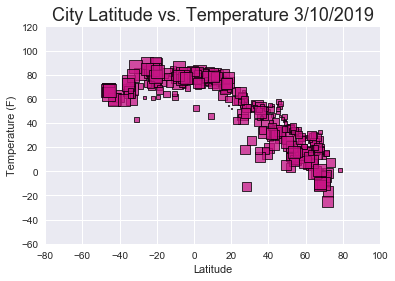

In [221]:
plt.scatter(cities_weather["Latitude"], 
            cities_weather["Temperature (F)"], c="mediumvioletred",
            s=cities_weather["Longitude"],
            edgecolor="black", linewidths=1, marker="s", 
            cmap='plasma', alpha=.75, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature 3/10/2019", fontsize=18, ha='center')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("./output_vizes/lat_temp.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

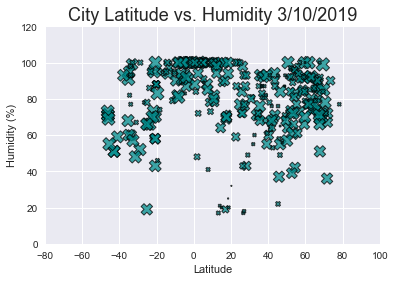

In [222]:
plt.scatter(cities_weather["Latitude"], 
            cities_weather["Humidity (%)"], c="darkcyan",
            s=cities_weather["Longitude"],
            edgecolor="black", linewidths=1, marker="X", 
            cmap='plasma', alpha=.75, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity 3/10/2019", fontsize=18, ha='center')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 120])

# Save the figure
plt.savefig("./output_vizes/lat_humid.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

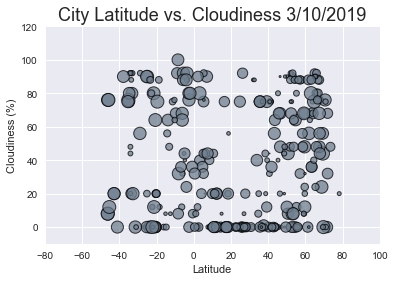

In [223]:
plt.scatter(cities_weather["Latitude"], 
            cities_weather["Cloudiness (%)"], c="slategray",
            s=cities_weather["Longitude"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=.75, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness 3/10/2019", fontsize=18, ha='center')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 120])

# Save the figure
plt.savefig("./output_vizes/lat_cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

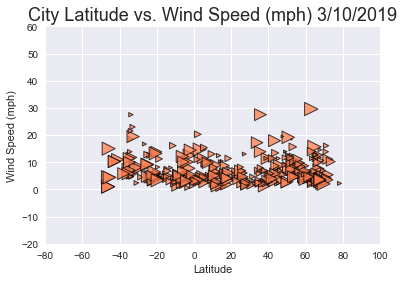

In [224]:
plt.scatter(cities_weather["Latitude"], 
            cities_weather["Wind Speed (mph)"], c="coral",
            s=cities_weather["Longitude"],
            edgecolor="black", linewidths=1, marker=">", 
            cmap='plasma', alpha=.75, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph) 3/10/2019", fontsize=18, ha='center')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 60])

# Save the figure
plt.savefig("./output_vizes/lat_wind.png")

# Show plot
plt.show()